In [1]:
from fbprophet import Prophet
from prophet.diagnostics import cross_validation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle('../Data/LD2011_2014.pkl')
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


In [3]:
df = df.resample('1h').sum()
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,8.883249,100.995733,6.950478,745.934959,368.292683,1363.095238,45.223290,1262.626263,367.132867,325.806452,...,1334.047109,158800.0,6810.126582,8954.545455,299.869622,17.554125,1503.072871,435.726210,2753.665689,33621.621622
2014-12-31 21:00:00,10.152284,91.038407,6.950478,648.373984,345.121951,1279.761905,46.353872,1077.441077,305.944056,280.645161,...,1309.064954,154300.0,6599.156118,5909.090909,299.869622,15.798713,1862.159789,619.365609,2648.093842,33135.135135
2014-12-31 22:00:00,7.614213,88.193457,6.950478,644.308943,347.560976,1258.928571,45.223290,1006.734007,286.713287,289.247312,...,1224.839400,141900.0,6544.303797,5500.000000,256.844850,31.012288,2620.719930,781.302170,2717.008798,30378.378378
2014-12-31 23:00:00,8.883249,85.348506,6.950478,646.341463,335.365854,1232.142857,42.962125,1003.367003,258.741259,290.322581,...,1087.794433,112300.0,6185.654008,4931.818182,113.428944,29.256875,2704.126427,646.076795,2637.096774,27729.729730


In [4]:
df = df.loc['2011-01-01':'2014-12-31']
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.883249,113.086771,6.950478,841.463415,381.707317,1589.285714,48.615037,1410.774411,405.594406,348.387097,...,1587.437545,166500.0,9915.611814,10409.090909,322.033898,18.139263,1869.183494,158.597663,2770.527859,35891.891892
2014-12-31 20:00:00,8.883249,100.995733,6.950478,745.934959,368.292683,1363.095238,45.223290,1262.626263,367.132867,325.806452,...,1334.047109,158800.0,6810.126582,8954.545455,299.869622,17.554125,1503.072871,435.726210,2753.665689,33621.621622
2014-12-31 21:00:00,10.152284,91.038407,6.950478,648.373984,345.121951,1279.761905,46.353872,1077.441077,305.944056,280.645161,...,1309.064954,154300.0,6599.156118,5909.090909,299.869622,15.798713,1862.159789,619.365609,2648.093842,33135.135135
2014-12-31 22:00:00,7.614213,88.193457,6.950478,644.308943,347.560976,1258.928571,45.223290,1006.734007,286.713287,289.247312,...,1224.839400,141900.0,6544.303797,5500.000000,256.844850,31.012288,2620.719930,781.302170,2717.008798,30378.378378


In [5]:
df_marked = df.copy()
starting = []
for column in tqdm(range(len(df.columns))):
    for i in range(len(df_marked)-1):
        if df.iloc[i,column] == 0 and df.iloc[i+1,column] == 0:
            df_marked.iloc[i,column] = np.nan
        elif df.iloc[i,column] == 0 and df.iloc[i+1,column] > 0:
            df_marked.iloc[i,column] = np.nan
            starting.append(i)
            break
        
df_marked
        

 29%|██▉       | 108/370 [00:36<01:29,  2.92it/s]


KeyboardInterrupt: 

In [ ]:
df_avg_1h = []
for i in tqdm(range(df_marked.shape[0])):
    df_avg_1h.append(df_marked.iloc[i,:].sum()/len(df_marked.iloc[i,:].dropna()))
df_avg_1h = pd.DataFrame(df_avg_1h,index=df_marked.index,columns=['avg_1h'])
df_avg_1h

100%|██████████| 1461/1461 [00:00<00:00, 9587.56it/s]


,avg_1h
2011-01-01,18521.558058
2011-01-02,30111.745911
2011-01-03,30402.897332
2011-01-04,30994.224044
2011-01-05,31139.857098
...,...
2014-12-27,51414.137167
2014-12-28,51178.646076
2014-12-29,52225.133468
2014-12-30,52232.889410


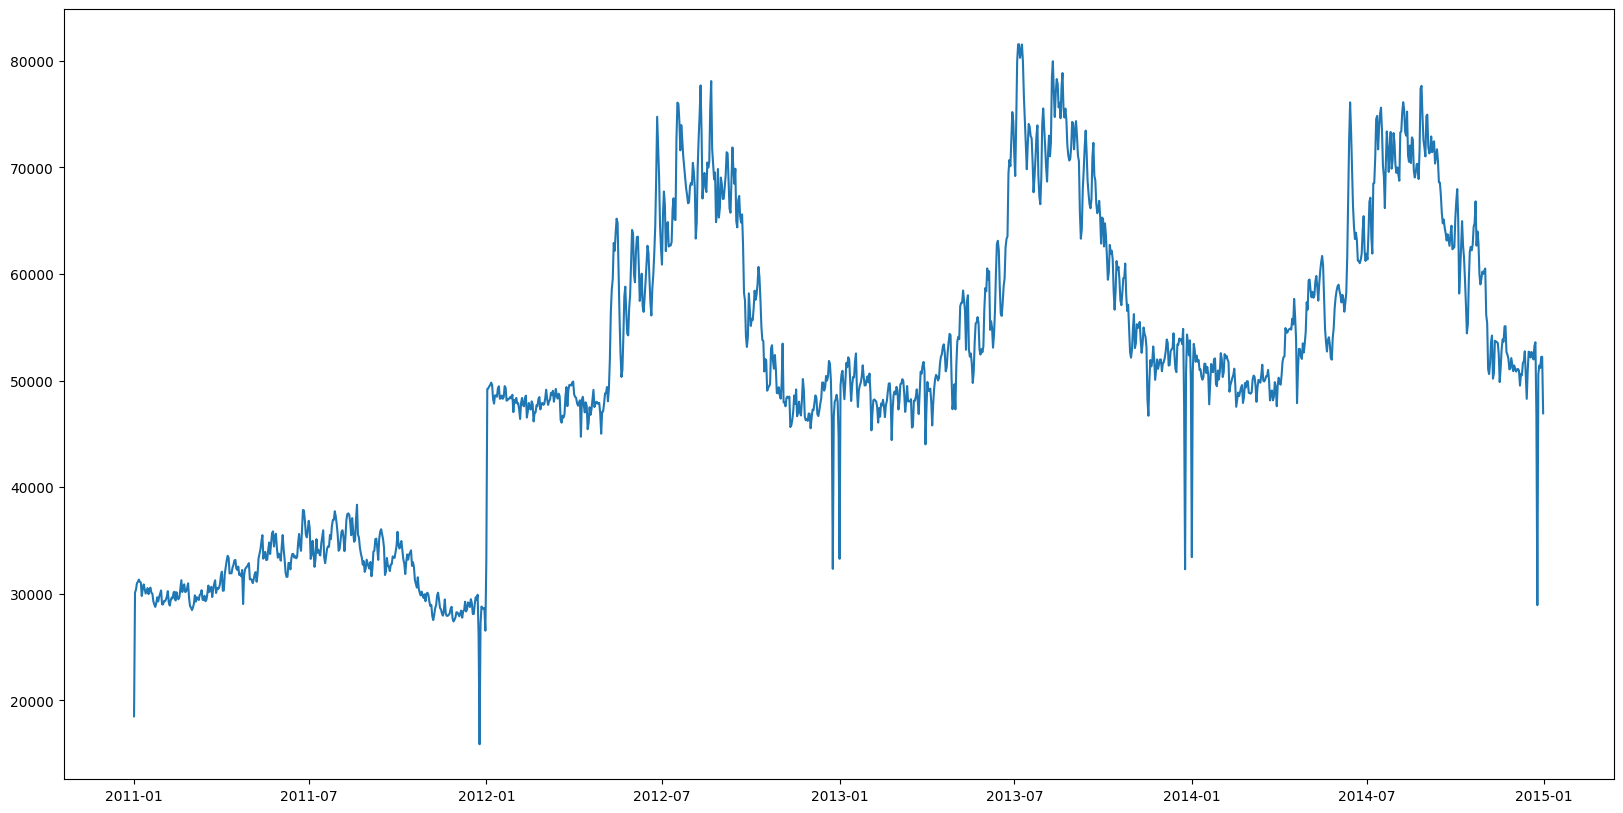

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_avg_1h)

In [ ]:
#df_avg_1h.to_pickle('../Data/df_avg_1h.pkl')

In [ ]:
df_avg_1h['ds'] = df_avg_1h.index
df_avg_1h['y'] = df_avg_1h['avg_1h']
df_avg_1h = df_avg_1h.drop('avg_1h',axis=1)

In [ ]:
df_avg_1h

,ds,y
2011-01-01,2011-01-01,18521.558058
2011-01-02,2011-01-02,30111.745911
2011-01-03,2011-01-03,30402.897332
2011-01-04,2011-01-04,30994.224044
2011-01-05,2011-01-05,31139.857098
...,...,...
2014-12-27,2014-12-27,51414.137167
2014-12-28,2014-12-28,51178.646076
2014-12-29,2014-12-29,52225.133468
2014-12-30,2014-12-30,52232.889410


In [ ]:
training_x = df_avg_1h.iloc[:int(len(df_avg_1h)*0.8)]
val_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.8):int(len(df_avg_1h)*0.9)]
testing_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.9):]

In [ ]:
print(training_x.shape)
print(val_x.shape)
print(testing_x.shape)


(1168, 2)
(146, 2)
(147, 2)


In [ ]:
m = Prophet(growth='linear',yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
m.add_country_holidays(country_name='PT')
m.fit(training_x)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2957.44     0.0059779       487.363      0.8889      0.8889      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          3048     0.0463919       2308.92           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3076.09    0.00309457       134.398     0.06659           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3085.09    0.00225573       121.186           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3090.22    0.00228306       57.4445           1           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [ ]:
future = val_x[['ds']]
future.tail()

,ds
2014-08-02,2014-08-02
2014-08-03,2014-08-03
2014-08-04,2014-08-04
2014-08-05,2014-08-05
2014-08-06,2014-08-06


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
141,2014-08-02,65511.352405,57837.474297,73459.423671
142,2014-08-03,64398.150580,56796.663437,72857.457051
143,2014-08-04,65092.525330,56935.310925,73088.964238
144,2014-08-05,66091.080139,57966.339634,74276.792985
145,2014-08-06,66138.174154,57799.839088,74683.979887


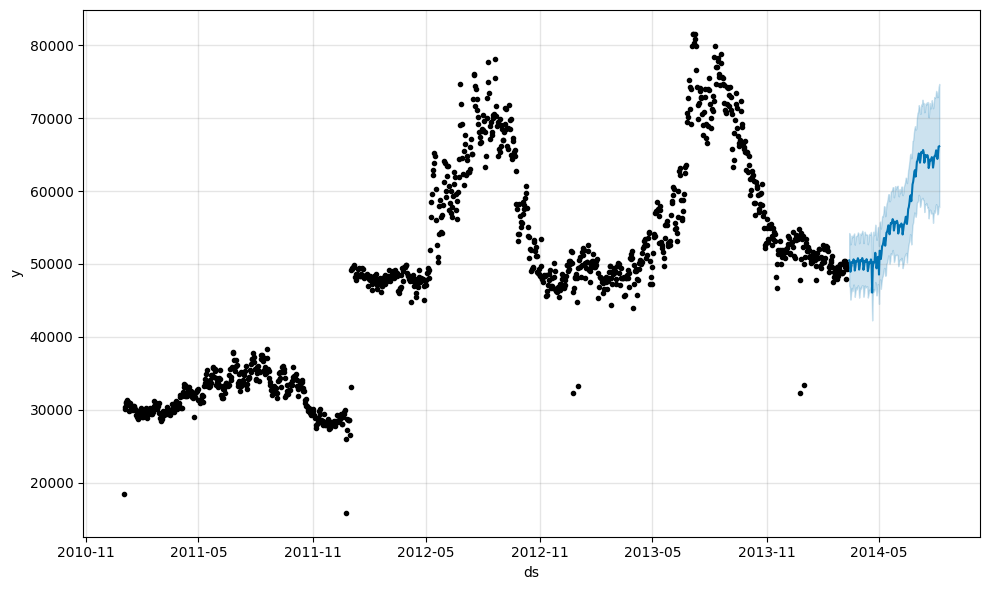

In [ ]:
fig1 = m.plot(forecast)

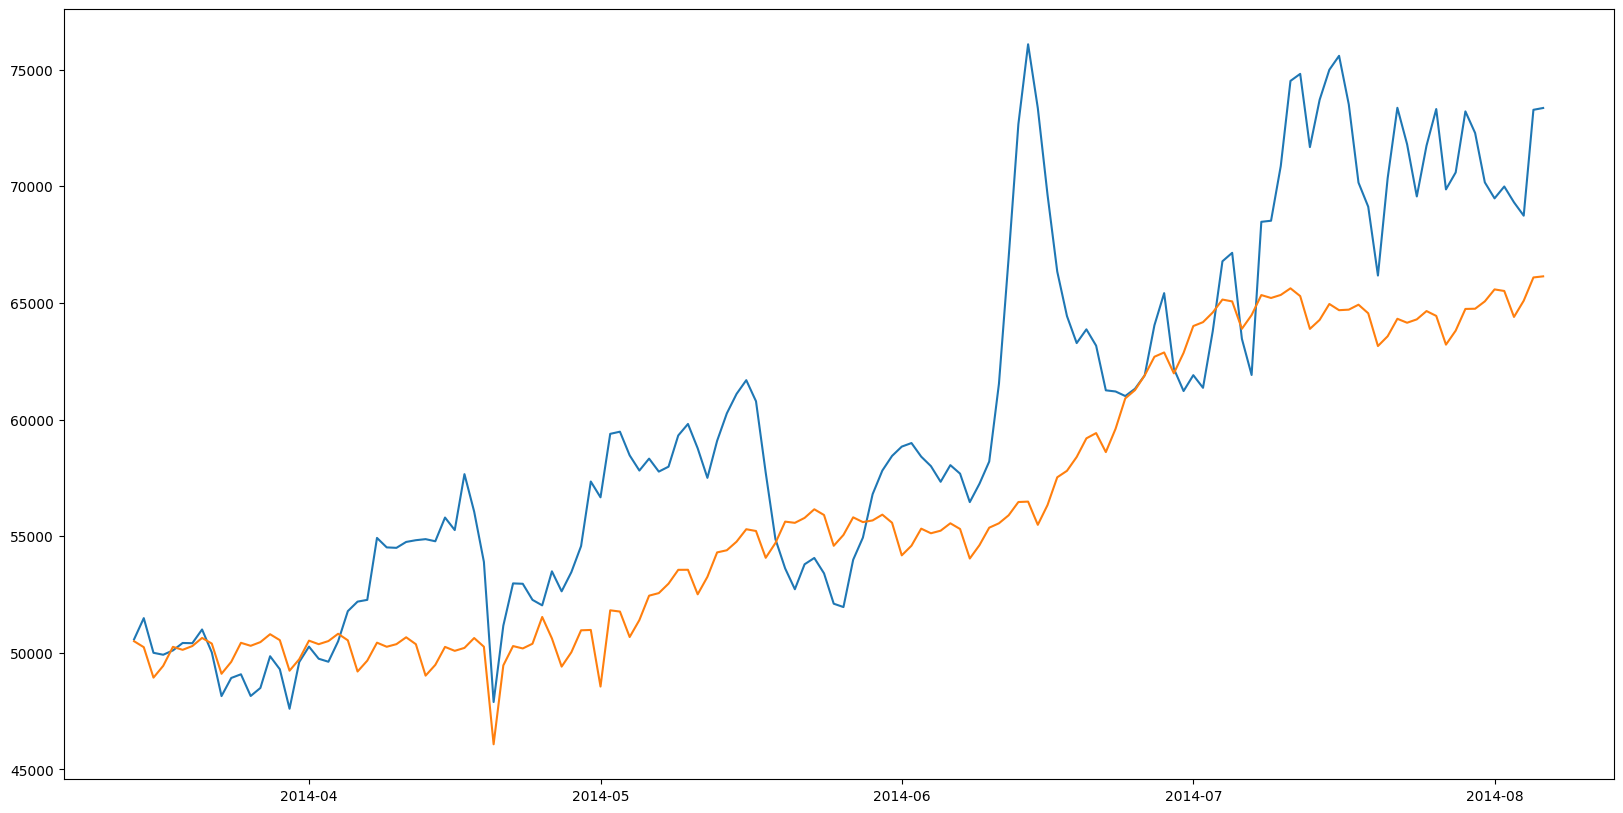

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(val_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [ ]:
print(mean_absolute_percentage_error(val_x['y'],forecast['yhat']))

0.06670307648631148


In [ ]:
testing_x = pd.concat([val_x,testing_x],axis=0)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


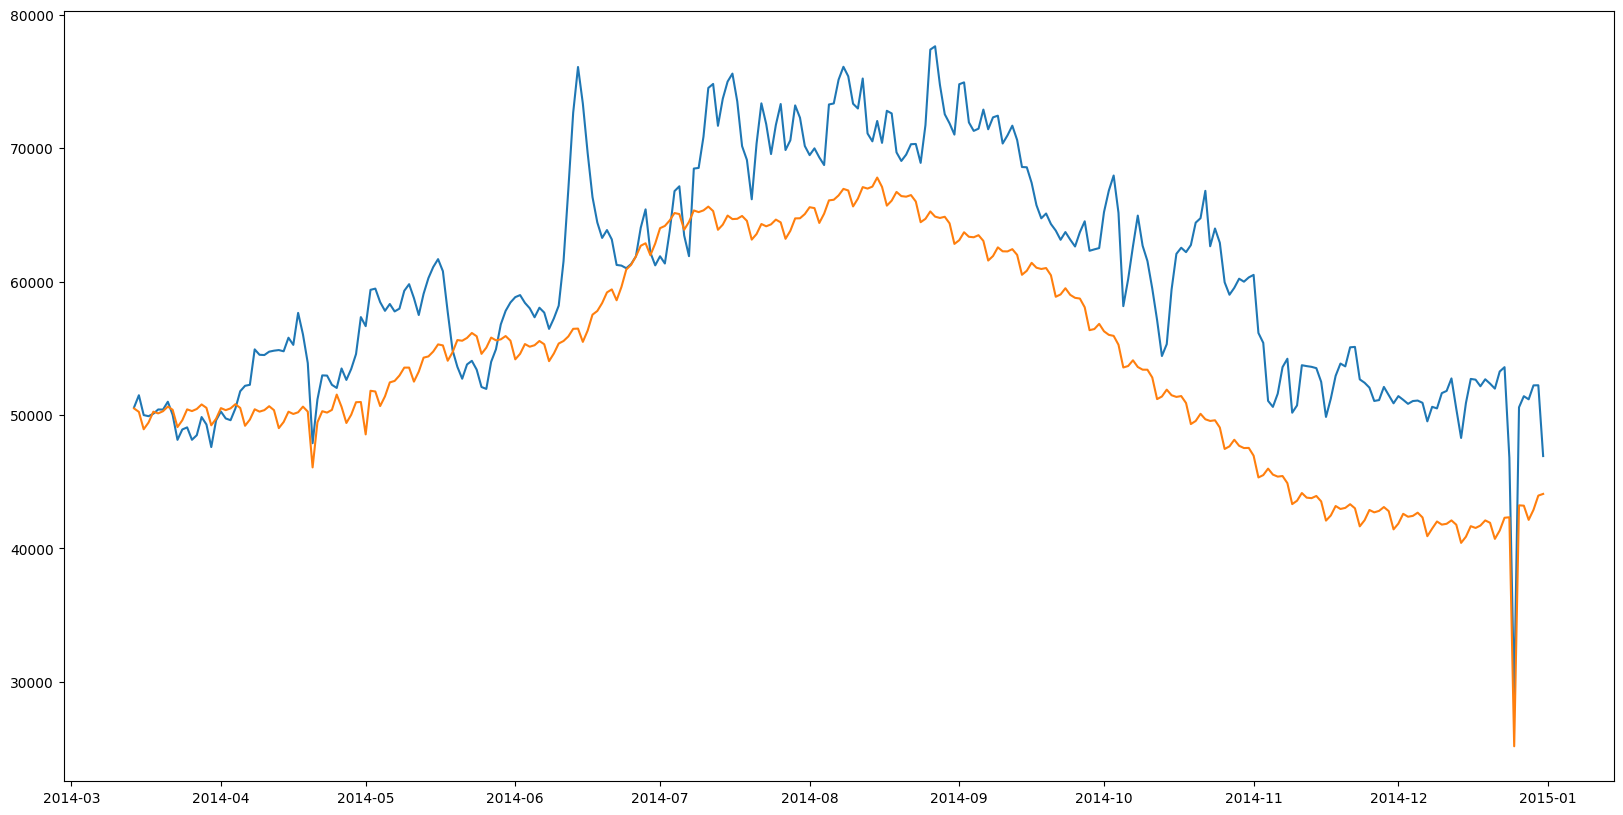

In [ ]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [ ]:
print(mean_absolute_percentage_error(testing_x['y'],forecast['yhat']))

0.10535499794691063


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


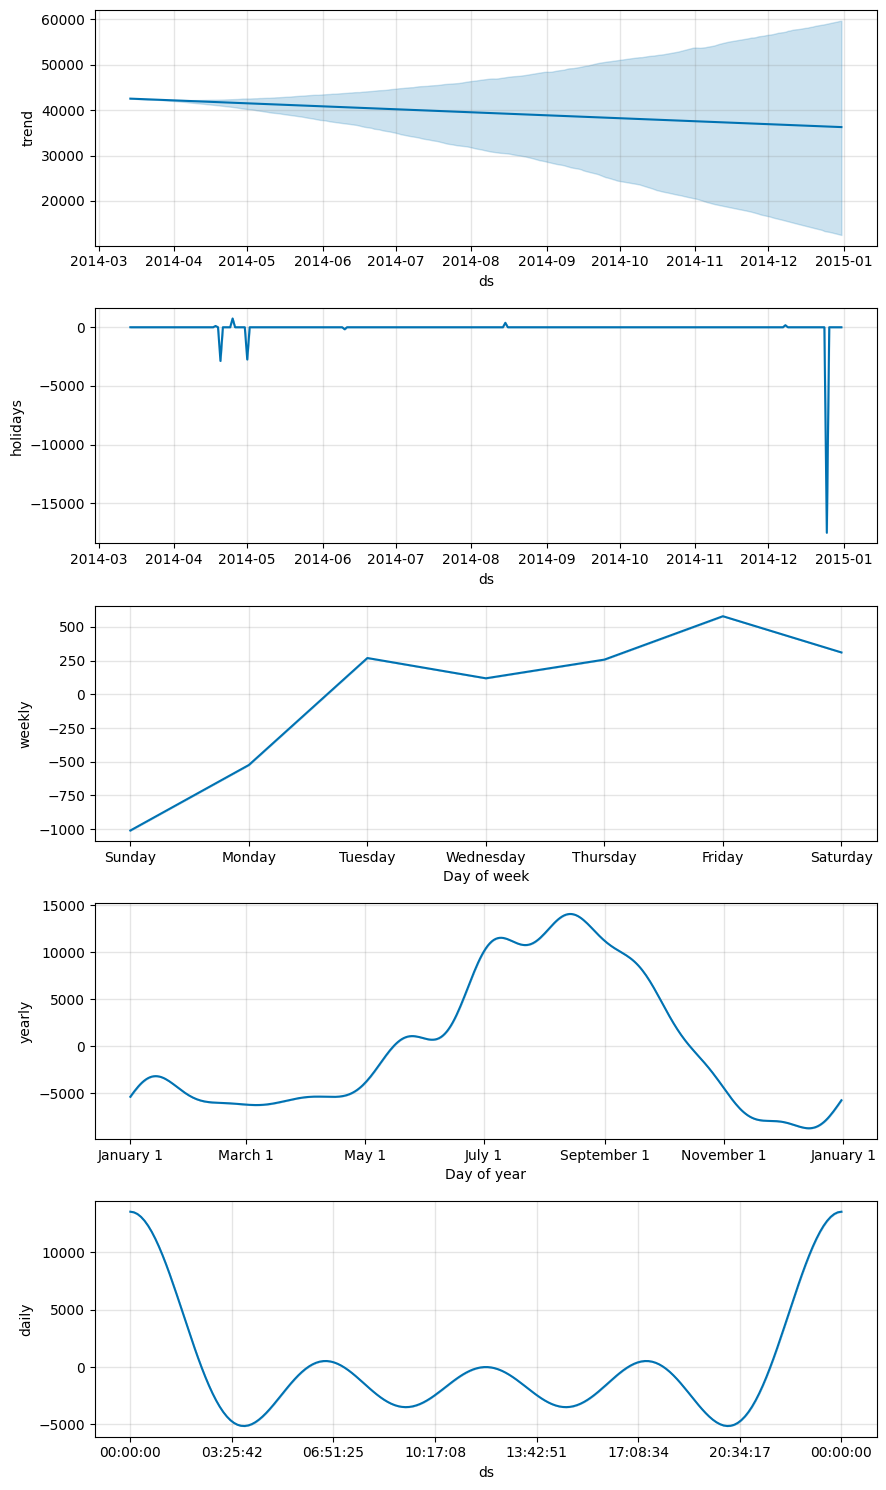

In [ ]:
fig = m.plot_components(forecast)

# Hyperparameter tuning with Bayes Optimization

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def prophet_objective(changepoint_prior_scale, seasonality_prior_scale, interval_width):
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        interval_width= interval_width,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
    )
    model.add_country_holidays(country_name='PT')
    model.fit(training_x)

    forecast = model.predict(testing_x[['ds']])
    mse = mean_absolute_percentage_error(testing_x['y'], forecast['yhat'])
    return -mse

# Set bounds for the hyperparameters
bounds = {
    'changepoint_prior_scale': (0.01, 0.95),
    'seasonality_prior_scale': (0.01, 10),
    'interval_width': (0.01,0.95)
    
}

# Initialize the Bayesian optimization
optimizer = BayesianOptimization(
    f=prophet_objective,
    pbounds=bounds,
    random_state=42,
)

# Perform the optimization
optimizer.maximize(init_points=10, n_iter=20)

|   iter    |  target   | change... | interv... | season... |
-------------------------------------------------------------
Initial log joint probability = -28.141


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3141.19    0.00335053       660.528      0.6295      0.6295      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3249.22     0.0426207       1222.52           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3308.84    0.00444077       157.475      0.5006      0.5006      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3329.94    0.00422731       253.396      0.3821           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3343.58    0.00374255       196.503      0.2603           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 1         | -0.09484  | 0.3621    | 0.9037    | 7.323     |
Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


      99       3162.37    0.00375061       319.807           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3245.71     0.0346046       788.421           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3318.43    0.00274496       427.903           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3339.08    0.00590864       488.696           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3354.39     0.0645683       646.629           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       3364.71     0.0055088       196.405      0.8452      0.8452      683   
    Iter      log 

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3026.96    0.00832085       352.858           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3120.81    0.00897459       371.142           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3140.32     0.0129962       351.349      0.8084      0.8084      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       3144.17    5.5684e-05       153.212    1.95e-07       0.001      521  LS failed, Hessian reset 
     399       3144.93    0.00322361        385.76           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485       3148.93   4.24917e-05       134.362   3.249e-07       0.001      

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 3         | -0.1027   | 0.0646    | 0.8242    | 6.015     |
Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3140.35     0.0181732       1148.05           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3250.03    0.00496205       1967.45      0.5616      0.5616      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3332.91      0.013787       567.997           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3348.58    0.00243849       492.787           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3369.69    0.00808215       89.7064           1           1      573   
   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 4         | -0.07849  | 0.6756    | 0.02935   | 9.699     |
Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3174.57     0.0254655       306.527           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3322.76     0.0154985       364.686           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3339.84     0.0211634       729.738      0.8719      0.8719      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3351.78    0.00150134       84.1728           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3370.09   0.000236263       88.5616           1           1      578   
   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


91554       231.888           1           1     1389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       3437.94    0.00979382       161.762       0.254           1     1504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       3439.32   0.000820166       359.515           1           1     1615   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       3440.21    0.00106283       30.8464      0.9544      0.9544     1733   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599       3440.66    0.00348232       60.3606           1           1     1845   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699       3441.21   0.000115759       92.7002      0.6364      0.6364     1954   
    Iter      log prob        ||dx||      ||grad|

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


   3303.85     0.0284541       633.371           1           1      705   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699       3310.54    0.00108573       57.4785      0.6348      0.6348      820   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799       3315.08    0.00649989         329.6           1           1      936   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       3318.33     0.0057197        211.19      0.6356      0.6356     1047   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       3319.77    0.00234612       186.594      0.3813      0.9116     1173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       3320.57    0.00408854       96.8142           1           1     1299   
    Iter      log prob        

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3142.9     0.0444804       1849.57           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3264.31      0.112567       2042.27      0.8683     0.08683      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3325.27    0.00148383       178.439           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3333.99    0.00828886       293.403           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3346.44    0.00568153        182.48      0.9621      0.9621      580   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 7         | -0.082    | 0.416     | 0.2838    | 6.122     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3110.68     0.0107356       257.515           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3207.61     0.0245517       1650.76       0.308           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3247.35     0.0195883       506.717           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3262.08     0.0111065       124.348           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3266.58     0.0158275       442.064           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 8         | -0.0943   | 0.1411    | 0.2846    | 3.67      |
Initial log joint probability = -28.141


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3155.86     0.0205635       1091.53      0.8771     0.08771      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3288.09     0.0368552        304.44           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3319.43   0.000516764       79.4566      0.4224      0.4224      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3340.97     0.0363736       638.474           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3348.81    0.00135681       99.7072      0.9771      0.9771      573   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 9         | -0.09533  | 0.4387    | 0.7481    | 2.005     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3160.86    0.00282979       294.786           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3234.02     0.0621075        2210.8       1.711      0.1711      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3323.94    0.00105947       74.3605           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3337.37   0.000753893       289.863      0.6901      0.6901      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3346.48      0.147504        909.03           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3162.55     0.0402563       1223.27           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3297.77     0.0869759       1920.08      0.2165           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3334.96    0.00174841       192.036      0.6791      0.6791      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3342.63    0.00306435       444.409           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3369.84   0.000606232        137.97      0.8313      0.8313      576   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 11        | -0.08084  | 0.7482    | 0.1247    | 1.901     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3126.28     0.0858531       3146.44           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3304.22    0.00779439       643.576           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3330.95    0.00798488       1283.22      0.5198           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3365.21   0.000939376       117.004      0.6616      0.6616      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3368.48    0.00362495       286.266           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 12        | -0.09058  | 0.8095    | 0.2571    | 1.854     |
Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3124.98     0.0288195        2840.3           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3296.94    0.00317088       1434.38     0.04801           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3308.17    0.00360573       229.311           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          3329      0.016845       752.668           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3339.74     0.0214175       333.772           1           1      576   
   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199          3369    0.00190983       154.925      0.7745      0.7745     1373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       3369.82    0.00218823       50.8378           1           1     1492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1376       3370.44   1.49008e-05       51.2378    1.72e-07       0.001     1624  LS failed, Hessian reset 
    1399       3370.49   0.000186744       139.166      0.2808      0.2808     1651   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499       3371.12    0.00042129        50.223           1           1     1767   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1587       3371.68     2.598e-05       31.9713   1.724e-06       0.001     1906  LS failed, Hessian reset 


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 13        | -0.08973  | 0.3157    | 0.4604    | 1.436     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3128.24     0.0108425       752.503           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3313.53      0.112947       1316.96           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3353.72    0.00233471       433.736      0.4241      0.4241      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3366.52    0.00509244       225.622           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3371.47    0.00579845       69.7672           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 14        | -0.07486  | 0.8964    | 0.3558    | 2.221     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3127.69     0.0292986       1042.42           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3287.07     0.0981747       3271.76           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3337.05    0.00968687       792.117           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3354.74    0.00269624       137.516      0.7826      0.7826      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3362.83    0.00400915       470.991       0.403           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 15        | -0.06057  | 0.8505    | 0.8198    | 4.138     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3151.23     0.0100347       634.749           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3284.17     0.0176001       1250.91           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3307.81      0.032029       472.249           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3328.25   0.000672091       127.209           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3335.99    0.00399682       156.228           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 16        | -0.09503  | 0.3224    | 0.6491    | 9.63      |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3065.57      0.036166       1886.52       0.506           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3145.57     0.0132549       387.046           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3200.85    0.00832966       133.682           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3212.16   0.000255785       177.908      0.5883      0.5883      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     437       3213.52   2.33483e-05       73.6957   3.997e-07       0.001      564  LS failed, Hessian reset 
     499        3216.8    0.00259397     

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 17        | -0.1252   | 0.09876   | 0.7632    | 5.961     |
Initial log joint probability = -28.141

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3153.61     0.0563081       2459.61           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3232.39     0.0126841        533.04           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3306.26    0.00276627       341.121           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3315.01      0.012766       1403.41     0.09439           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3349.05     0.0026145       242.938      0.7011      0.7011      578   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599    

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 18        | -0.09448  | 0.3889    | 0.8003    | 7.578     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3163.64    0.00330791       1402.87           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3279.39     0.0625378       864.157           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3329.28    0.00239494       126.808           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3355.63    0.00656064       258.344           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3370.58    0.00241663       461.702     0.08352           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha   

SystemError: <class 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_6597585020735909517.PyStanHolder'> returned a result with an error set

In [ ]:
# Extract the best hyperparameters
best_params = optimizer.max['params']

# Train and evaluate the model with the best hyperparameters
best_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)
best_model.fit(training_x)
best_forecast = best_model.predict(testing_x[['ds']])
best_mse = mean_absolute_percentage_error(testing_x['y'], best_forecast['yhat'])

print(f"Best hyperparameters: {best_params}")
print(f"Best MSE: {best_mse}")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


      99       2778.83    0.00360735       273.745           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       2807.49   0.000196285        173.68   6.049e-07       0.001      235  LS failed, Hessian reset 
     174       2811.02   0.000167493        164.12   1.211e-06       0.001      290  LS failed, Hessian reset 
     199       2814.35    0.00303526        126.43           1           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       2825.64   0.000345917       210.023   4.813e-07       0.001      448  LS failed, Hessian reset 
     299       2830.12     0.0014828       196.531           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       2835.16    0.00127707       271.375   3.439e-06       0.001      564  LS failed, Hessian reset 
     399       2843

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


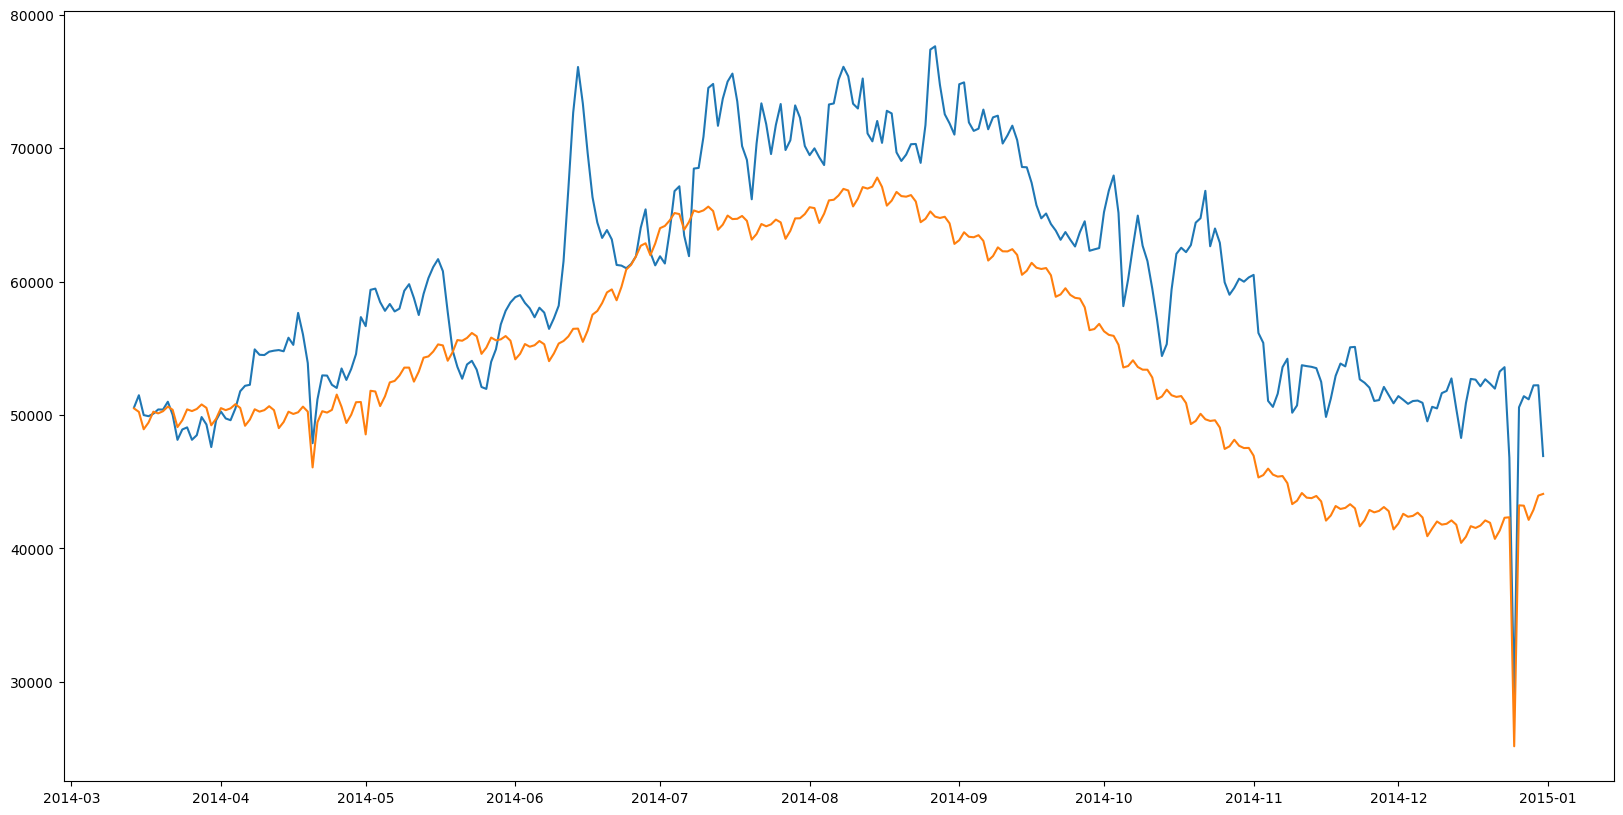

In [ ]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')